In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score
import seaborn as sb

In [2]:
data = pd.read_csv("fer2013.csv")

In [3]:
data = data.drop('Usage', axis=1)

In [4]:
data = data[data['emotion'] != 1]

In [5]:
data.loc[data.emotion == 2, 'emotion'] = 1
data.loc[data.emotion == 3, 'emotion'] = 2
data.loc[data.emotion == 4, 'emotion'] = 3
data.loc[data.emotion == 5, 'emotion'] = 4
data.loc[data.emotion == 6, 'emotion'] = 5

In [6]:
data

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,1,231 212 156 164 174 138 161 173 182 200 106 38...
3,3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,5,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,2,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,2,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [7]:
images = []
labels = []

In [8]:
for index, row in data.iterrows():
    image = np.fromstring(row['pixels'], dtype=int, sep=' ')
    image = np.reshape(image, (48, 48, 1))
    image = image.astype('float32')/255
    images.append(image)
    labels.append(row['emotion'])

In [9]:
emotions = {0: 'Angry', 1: 'Fear', 2: 'Happy', 3: 'Sad', 4: 'Surprise', 5: 'Neutral'}

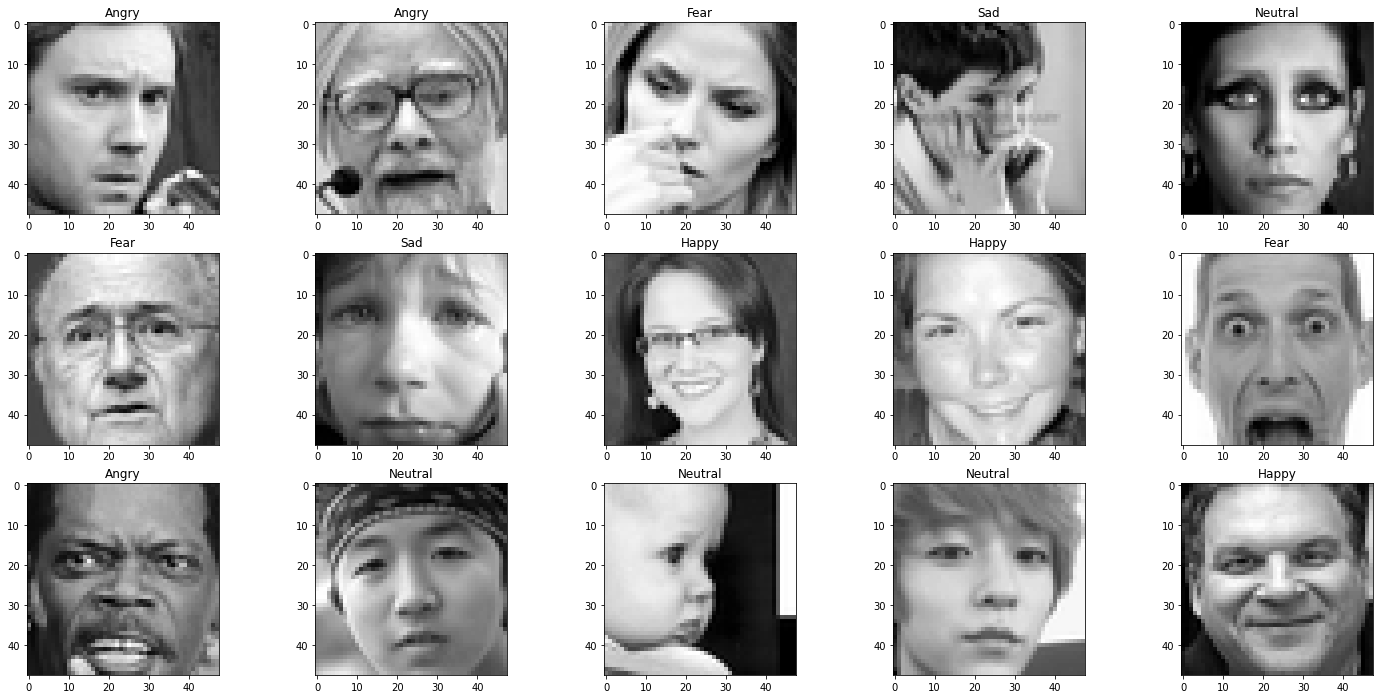

In [10]:
fig, axs = plt.subplots(3, 5, figsize=(25, 12))
axs = axs.ravel()
for i in range(15):
    axs[i].imshow(images[i][:,:,0], cmap='gray')
    axs[i].set_title(str(emotions[labels[i]]))

In [11]:
labels = to_categorical(labels)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=27021994)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=27021994)

In [12]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

history=model.fit(
    x=train_images, 
    y=train_labels,
    epochs=100,
    callbacks=my_callbacks,
    validation_data=(val_images, val_labels),
    batch_size=32
)

Epoch 1/100
332/332 [==============================] - 10s 16ms/step - loss: 2.3918 - accuracy: 0.2024 - val_loss: 1.9752 - val_accuracy: 0.2528
Epoch 2/100
332/332 [==============================] - 4s 13ms/step - loss: 1.7062 - accuracy: 0.3261 - val_loss: 2.1306 - val_accuracy: 0.2773
Epoch 3/100
332/332 [==============================] - 5s 14ms/step - loss: 1.5202 - accuracy: 0.3973 - val_loss: 1.9786 - val_accuracy: 0.3135
Epoch 4/100
332/332 [==============================] - 4s 13ms/step - loss: 1.4054 - accuracy: 0.4437 - val_loss: 1.3421 - val_accuracy: 0.4672
Epoch 5/100
332/332 [==============================] - 5s 14ms/step - loss: 1.3478 - accuracy: 0.4685 - val_loss: 1.2978 - val_accuracy: 0.4914
Epoch 6/100
332/332 [==============================] - 4s 13ms/step - loss: 1.3125 - accuracy: 0.4802 - val_loss: 1.2672 - val_accuracy: 0.5062
Epoch 7/100
332/332 [==============================] - 4s 13ms/step - loss: 1.2595 - accuracy: 0.5101 - val_loss: 1.2399 - val_accuracy

In [15]:
predictions=[np.argmax(im) for im in model.predict(test_images)]
labels = [np.argmax(i) for i in test_labels]
accuracy_score(predictions,labels)

0.6022920203735145

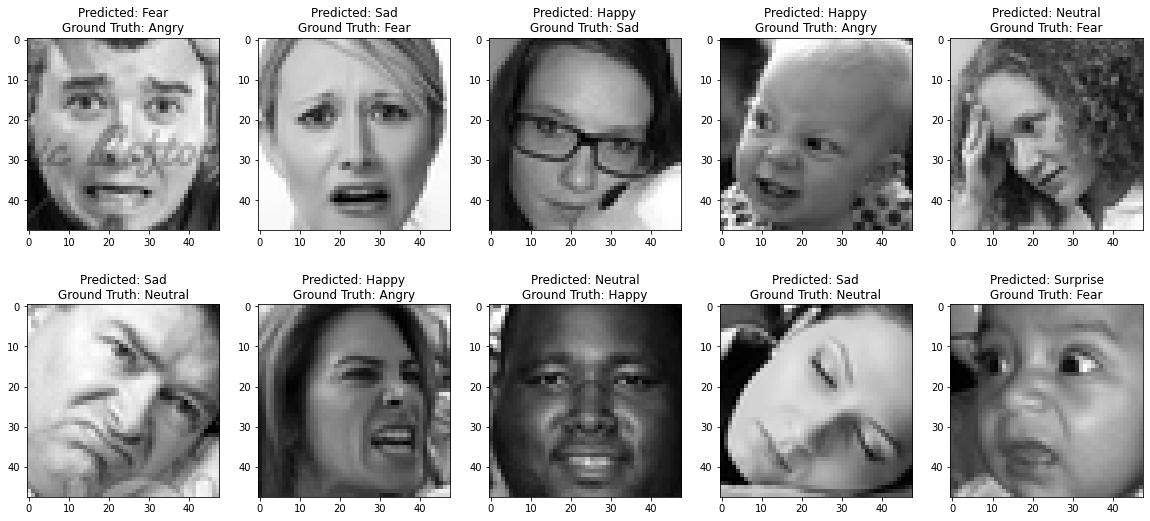

In [16]:
cols = 0
rows = 0
disagree = []

for i in range(len(labels)):
    if labels[i] != predictions[i]:
        disagree.append(i)
        if len(disagree) == 10:
            break

fig, axs = plt.subplots(2, 5, figsize=(20,9))

for i in range(10):
    image=(np.array(list(test_images)[disagree[i]])/256)[:,:,0]
    axs[cols, rows].imshow(image, cmap='gray')
    axs[cols, rows].set_title('Predicted: ' + str(emotions[predictions[disagree[i]]]) + '\nGround Truth: ' + str(emotions[labels[disagree[i]]]))
    rows = rows+1
    if rows == 5:
        cols = cols + 1
        rows = 0

<AxesSubplot:>

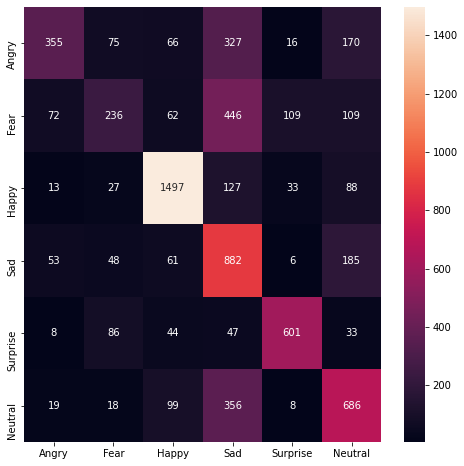

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
sb.heatmap(ax=ax, 
           data=pd.DataFrame(tf.math.confusion_matrix(labels, predictions, num_classes=6).numpy().astype(int), 
                     index=["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"], 
                     columns=["Angry", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
           ), 
           annot=True, 
           annot_kws={"size": 10},
           fmt='g'
          )